# **Instal & Import Library**

In [20]:
!pip install geopandas
!pip install folium
!pip install contextily

In [2]:
#import library untuk kmeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import contextily as ctx
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely import wkt

# **Loading Dataset**

In [21]:
#Import dataset menggunakan link gdrive
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Fv3XNg0mUqsQnVE7i7igCBKvOYYiT8P1')

#Menampilkan 5 baris teratas
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

# **Data Preprocesing**

In [23]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Rainfall (mm),0
Temperature (°C),0
Humidity (%),0
River Discharge (m³/s),0
Water Level (m),0
Elevation (m),0
Land Cover,0
Soil Type,0


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


# **Visualisasi Heatmap Sebaran Banjir**

In [28]:
# Buat peta dasar Indonesia
peta = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Buat list data [lat, long, value] untuk heatmap
data_heatmap = df[['Latitude', 'Longitude', 'Flood Occurred']].values.tolist()

# Tambahkan heatmap ke peta
HeatMap(data_heatmap, radius=12, blur=15, max_zoom=6).add_to(peta)

# Tampilkan peta
peta

# **Uji Normalitas**

In [30]:
#Memilih kolom untuk normalisasi
norm_df = df.drop(columns=['Land Cover','Soil Type', 'Infrastructure', 'Historical Floods','Flood Occurred'])

#Menampikan kolom yang ingin dinormalisasi
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Population Density      10000 non-null  float64
dtypes: float64(9)
memory usage: 703.3 KB


In [52]:
#Uji normalisasi (berdistribusi normal/tidak)
stat, p = shapiro(norm_df)

print("Statik   :", stat)
print("P-value  :", p)

if p > 0.05:
  print('Data memiliki distribusi normal (tidak tolak H0)')
else:
  print('Data tidak memiliki distribusi normal (tolak H0)')

Statik   : 0.955699041338412
P-value  : 4.7360818745922884e-89
Data tidak memiliki distribusi normal (tolak H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 90000.



# **Analisis Matrix Korelasi Spearman**

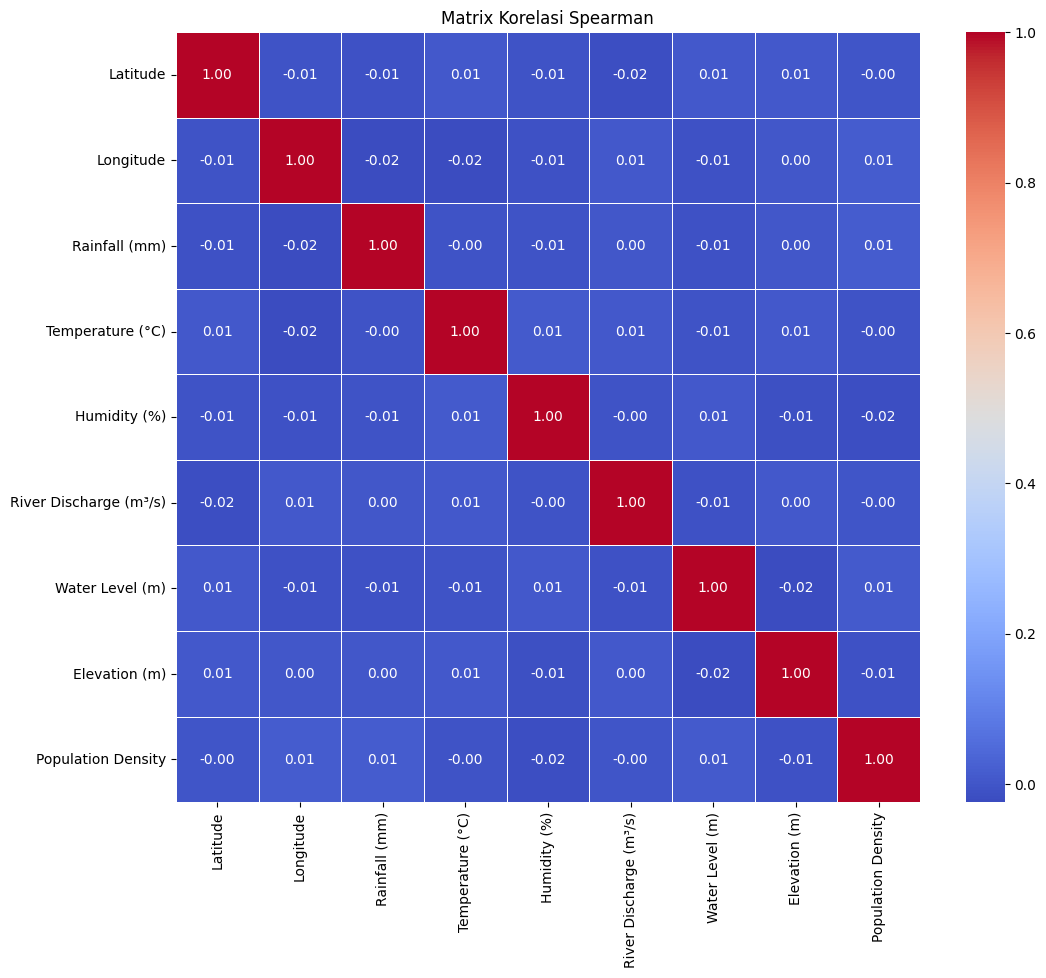

In [32]:
#Membuat matrix korelasi dengan Spearman
corr_df = norm_df

corr_matrix = corr_df.corr(method='spearman')

#Menampilkan matrix korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrix Korelasi Spearman')
plt.show()

# **Normalisasi Data dengan RobustScaler**

In [45]:
#Normalisasi data menggunakan robustScaler
columns = norm_df.columns

scaler = RobustScaler()

norm_df = scaler.fit_transform(norm_df)
norm_df = pd.DataFrame(norm_df, columns=columns)

norm_df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density
0,-0.238999,-0.263178,0.464286,0.276086,-0.384835,0.687117,0.476039,-0.920832,0.442020
1,0.928107,-0.344225,-0.646851,-0.081433,-0.788020,-0.023310,0.755925,0.664093,0.365952
2,0.485064,-0.656161,-0.316603,0.928456,-0.725710,-0.625642,-0.082292,-0.504058,-0.143077
3,0.214978,0.201718,0.328385,-0.561813,-0.618418,0.464363,-0.431282,-0.434215,0.218502
4,-0.681639,-0.058250,-0.040696,0.175561,-0.573017,-0.176061,-0.371778,-0.550571,0.219484


#  **Menentukan Parameter ε epsilon menggunakan K-Distance Graph**

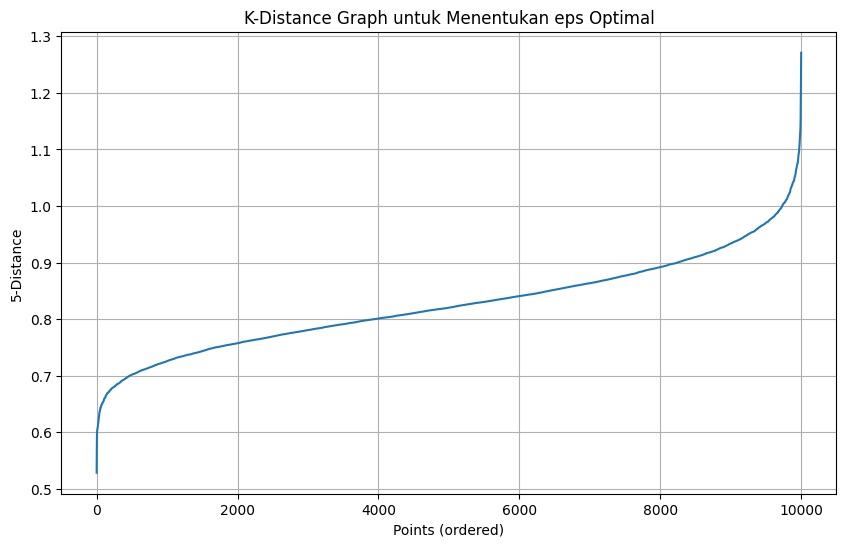

In [46]:
#Menggunakan data hasil normalisasi
X = norm_df.values

#Tentukan jumlah tetangga (min_samples biasanya = 4-10)
k = 5

#Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

#Ambil jarak tetangga ke-k (k-distance)
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title("K-Distance Graph untuk Menentukan eps Optimal")
plt.ylabel(f"{k}-Distance")
plt.xlabel("Points (ordered)")
plt.grid(True)
plt.show()

# **Clustering dengan DBSCAN**

In [53]:
dbscan = DBSCAN(eps=0.89, min_samples=5)
labels = dbscan.fit_predict(norm_df.values)

df["Cluster_DBSCAN"] = labels
print(df["Cluster_DBSCAN"].value_counts())

Cluster_DBSCAN
 0    9670
-1     326
 1       4
Name: count, dtype: int64


# **Evaluasi Kualitas Clustering menggunakan Silhouette Score**

In [48]:
# label = -1 menunjukkan noise (titik yang tidak masuk cluster)
mask = labels != -1 # hilangkan noise

# Hitung Silhouette Score hanya untuk titik yang memiliki cluster (bukan noise)
score = silhouette_score(norm_df[mask], labels[mask])

print("Silhouette Score:", score)

Silhouette Score: 0.10626179669637635


# **Visualisasi Hasil Clustering dengan PCA (2D)**

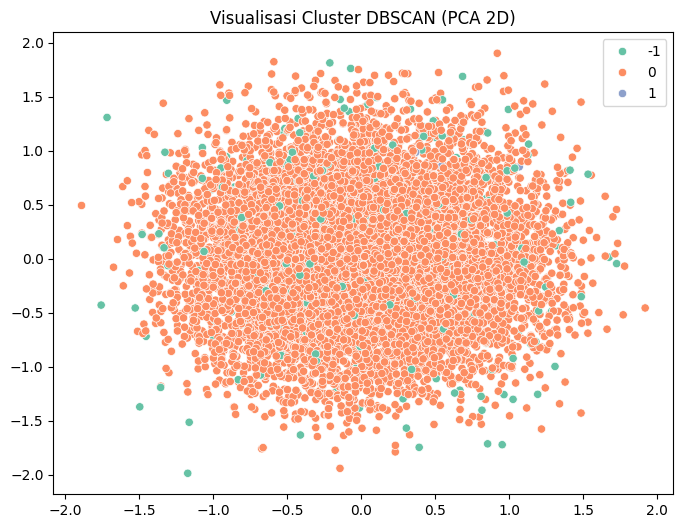

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(norm_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=labels, palette="Set2")
plt.title("Visualisasi Cluster DBSCAN (PCA 2D)")
plt.show()

# **Pengelompokan Kualitatif Cluster**

In [50]:
def klasifikasi_db(x):
    if x == 0:
        return "Baik"
    elif x == -1:
        return "Noise"
    else:
        return "Kurang"

df['Klasifikasi_DBSCAN'] = df['Cluster_DBSCAN'].apply(klasifikasi_db)

print(df['Klasifikasi_DBSCAN'].value_counts())

Klasifikasi_DBSCAN
Baik      9670
Noise      326
Kurang       4
Name: count, dtype: int64


# **Visualisasi Interaktif Persebaran Cluster (Plotly)**

In [51]:
df_pca_db = pd.DataFrame(reduced, columns=['PCA 1', 'PCA 2'])
df_pca_db['Klasifikasi_DBSCAN'] = df['Klasifikasi_DBSCAN']
df_pca_db["Lokasi"] = df["Latitude"].astype(str) + ", " + df["Longitude"].astype(str)

fig = px.scatter(
    df_pca_db,
    x="PCA 1",
    y="PCA 2",
    color="Klasifikasi_DBSCAN",
    hover_name="Lokasi",
    title="Persebaran Data Berdasarkan Klasifikasi (DBSCAN)",
    width=1500,
    height=900
)

fig.show()